In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')
require('ggrepel')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


R[write to console]: Loading required package: ggrepel



In [12]:
%%R

# Read data
df <- read_csv('/Users/rachelp/Downloads/Most-Recent-Cohorts-Institution.csv')

Rows: 6681 Columns: 2989
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2973): OPEID, OPEID6, INSTNM, CITY, STABBR, ZIP, ACCREDAGENCY, INSTURL,...
dbl   (16): UNITID, HCM2, MAIN, NUMBRANCH, PREDDEG, HIGHDEG, CONTROL, ST_FIP...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
df=pd.read_csv('/Users/rachelp/Downloads/Most-Recent-Cohorts-Institution.csv')

In [14]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,834.0,36639.0,0.6044,34076.0,35597.0,43145.0,40299.0,35424.0,36050.0,36377.0
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1233.0,49652.0,0.7472,42254.0,49817.0,51571.0,48182.0,46435.0,42007.0,56164.0
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,...,78.0,50355.0,0.6286,36636.0,44836.0,NaN,39040.0,NaN,32311.0,49599.0
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,891.0,57542.0,0.7769,49469.0,60533.0,57411.0,56884.0,53803.0,45170.0,66070.0
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1077.0,32797.0,0.5178,30634.0,34533.0,38216.0,30602.0,32364.0,29836.0,35315.0


In [15]:
df.dtypes

UNITID                      int64
OPEID                     float64
OPEID6                    float64
INSTNM                     object
CITY                       object
                           ...   
MD_EARN_WNE_INC3_P10      float64
MD_EARN_WNE_INDEP1_P10    float64
MD_EARN_WNE_INDEP0_P10    float64
MD_EARN_WNE_MALE0_P10     float64
MD_EARN_WNE_MALE1_P10     float64
Length: 2989, dtype: object

In [23]:
if 'EARN_MDN_HI_2YR' in df.columns.tolist():
    print("Column 'EARN_MDN_HI_2YR' is in the DataFrame")
else:
    print("Column 'EARN_MDN_HI_2YR' is not in the DataFrame")

Column 'EARN_MDN_HI_2YR' is not in the DataFrame


## My question is: Do more selective schools guarantee higher wages for graduates?
* Hypothesis: Schools that require higher SAT scores guarantee higher wages 
* Null hypothesis: SAT scores do not matter when picking a school that will guarantee higher wages 

In [24]:
import pandas as pd

df_2= df[['INSTNM', 'SAT_AVG', 'MD_EARN_WNE_P6']]

In [25]:
df_2

,INSTNM,SAT_AVG,MD_EARN_WNE_P6
0,Alabama A & M University,959.0,28704.0
1,University of Alabama at Birmingham,1245.0,39271.0
2,Amridge University,NaN,32939.0
3,University of Alabama in Huntsville,1300.0,47533.0
4,Alabama State University,938.0,25949.0
...,...,...,...
6676,Pennsylvania State University-Penn State Wilke...,NaN,NaN
6677,Pennsylvania State University-Penn State York,NaN,NaN
6678,Pennsylvania State University-Penn State Great...,NaN,NaN
6679,Pennsylvania State University-Penn State Harri...,NaN,NaN


In [28]:
df_2.to_csv('collegecost.csv', index=False)

In [26]:
%%R

require('ggrepel')

In [27]:
%%R 

library(ggrepel)

In [29]:
%%R

df_2 <- read_csv('/Users/rachelp/Documents/collegecost.csv')

Rows: 6681 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): INSTNM
dbl (2): SAT_AVG, MD_EARN_WNE_P6

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`geom_smooth()` using formula = 'y ~ x'


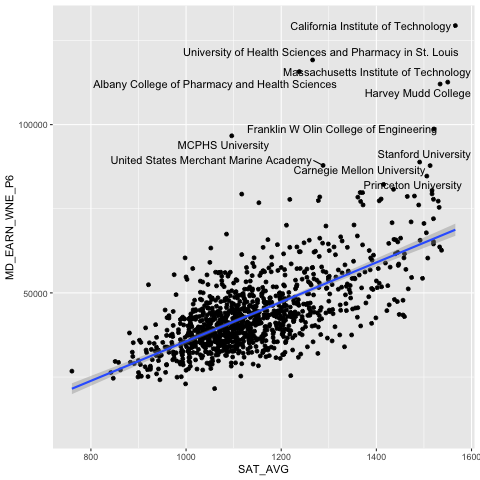

In [33]:
%%R -i df_2

ggplot(df_2) +
    aes(x=SAT_AVG, y=MD_EARN_WNE_P6, label=INSTNM) +
    scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
    geom_text_repel() +
    geom_point() +
    geom_smooth(method='lm')

In [34]:
%%R -i df_2

collegecost <- lm(MD_EARN_WNE_P6 ~ SAT_AVG, data=df_2)
summary(collegecost)


Call:
lm(formula = MD_EARN_WNE_P6 ~ SAT_AVG, data = df_2)

Residuals:
   Min     1Q Median     3Q    Max 
-23087  -5293  -1072   3668  68034 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23025.858   2361.696   -9.75   <2e-16 ***
SAT_AVG         58.619      2.061   28.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8986 on 1112 degrees of freedom
  (5567 observations deleted due to missingness)
Multiple R-squared:  0.4212,	Adjusted R-squared:  0.4207 
F-statistic: 809.2 on 1 and 1112 DF,  p-value: < 2.2e-16



## Given that the p-value is less than 0.05, I can reject the null hypothesis and say that schools that require higher SAT scores guarantee students higher wages 6 years after graduation. 
* However, only about 40% of the variance in wages can be explained by the SAT scores. 
* For every 1 point increase in SAT scores, wages go up by about 60 dollars a year.

## Now I can try and find the outliers

In [39]:
%%R -i df_2


to_plot <- df_2 %>% 
    # remove nulls
    filter(!is.na(MD_EARN_WNE_P6) & !is.na(SAT_AVG)) %>% 
    select(INSTNM, MD_EARN_WNE_P6, SAT_AVG) %>%
    mutate(predicted_MD_EARN_WNE_P6 = predict(collegecost),
          residuals = MD_EARN_WNE_P6 - predicted_MD_EARN_WNE_P6,
          residuals_z_scores = (residuals - mean(residuals)) / sd(residuals)) %>%
    arrange(-residuals_z_scores)
to_plot %>% head(10)

                                                      INSTNM MD_EARN_WNE_P6
1810 University of Health Sciences and Pharmacy in St. Louis         119219
2038          Albany College of Pharmacy and Health Sciences         115752
194                       California Institute of Technology         129420
1463                                        MCPHS University          96681
304                                      Harvey Mudd College         112059
1465                   Massachusetts Institute of Technology         112623
1466                          Massachusetts Maritime Academy          79354
2293                   United States Merchant Marine Academy          87884
4481                  Franklin W Olin College of Engineering          98699
2277                                   SUNY Maritime College          76793
     SAT_AVG predicted_MD_EARN_WNE_P6 residuals residuals_z_scores
1810    1266                 51185.28  68033.72           7.574471
2038    1238                 4

In [43]:
%%R

to_plot %>% tail(10)

                              INSTNM MD_EARN_WNE_P6 SAT_AVG
4031      Soka University of America          35734    1307
644  Florida Institute of Technology          31824    1241
1091                Grinnell College          43599    1448
2571                 Oberlin College          37507    1348
1019                 Earlham College          30866    1236
2296                  Vassar College          43438    1456
2809               Haverford College          42959    1459
3783          New College of Florida          32016    1277
2238          Sarah Lawrence College          33991    1333
2424           Warren Wilson College          25402    1220
     predicted_MD_EARN_WNE_P6 residuals residuals_z_scores
4031                 53588.64 -17854.64          -1.987829
644                  49719.81 -17895.81          -1.992413
1091                 61853.86 -18254.86          -2.032388
2571                 55992.00 -18485.00          -2.058010
1019                 49426.72 -18560.72      

## I think it's unsurprising that schools that specialize in health sciences and engineering guaranteed their students "value" in terms of wages when they graduate, while those that specialize in liberal arts had the least amount of "value." 
* Is there a better way to phrase this?
* My follow-up question would be, or this could maybe turn into a feature of: "Is a liberal arts education worth it?" and talk to higher education observers and these liberal arts spokespeople, and graduates to find out if they regret going to these colleges. 
* And on the flipside, a sub-head or a seperate story along the lines of "The most underrated universities in the U.S." and zoom in to lesser-known schools like University of Health Sciences and Pharmacy in St. Louis, Albany College of Pharmacy and Health Sciences, MCPHS University, and SUNY Maritime College and see what kinds of jobs their students are landing. And graduates if they are happy with the program they went to.
* Surprisingly, Ivy Leagues and Stanford aren't in the top 10 list. But it's a crude list that finds the median wage of ALL students in the college. Then again, another question is whether an Ivy League education is worth it too. 